In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_excel('Churn-Modelling.xlsx')

In [3]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

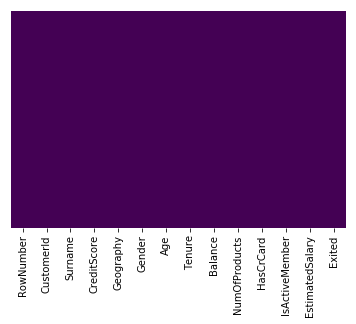

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [9]:
df['Gender'].count()

10000

In [10]:
df.shape

(10000, 14)

In [11]:
df.groupby('Gender').count()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Gender,,,,,,,,,,,,,
Female,4543,4543,4543,4543,4543,4543,4543,4543,4543,4543,4543,4543,4543
Male,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457,5457


In [12]:
df.groupby('Exited').count()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,,,,,,
0,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963
1,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037


In [13]:
df1= df.drop(['RowNumber','CustomerId'], axis=1)
df1

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [14]:
df1_Male = df1[df1['Gender']=='Male']
df_Female = df1[df1['Gender']=='Female']

Text(0.5,0,'Gender')

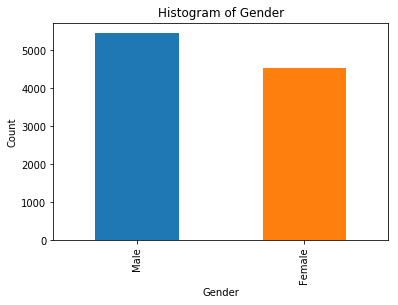

In [15]:
df1.Gender.value_counts().plot(kind = 'bar')
plt.title("Histogram of Gender")
plt.ylabel("Count")
plt.xlabel("Gender")

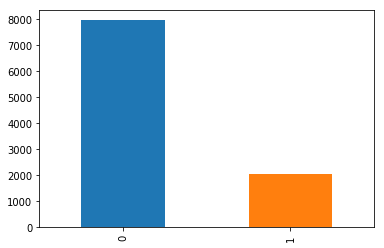

In [16]:
df.Exited.value_counts().plot(kind = 'bar')

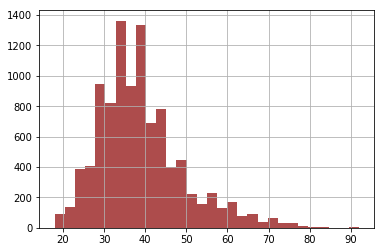

In [17]:
df['Age'].hist(bins=30,color='darkred',alpha=0.7)

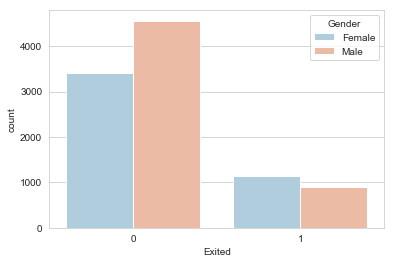

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='Exited',hue='Gender',data=df,palette='RdBu_r')

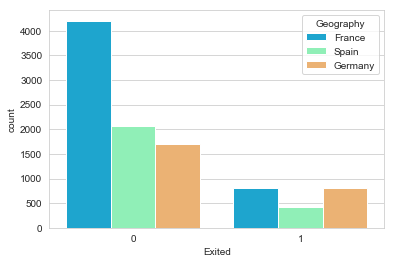

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='Exited',hue='Geography',data=df,palette='rainbow')

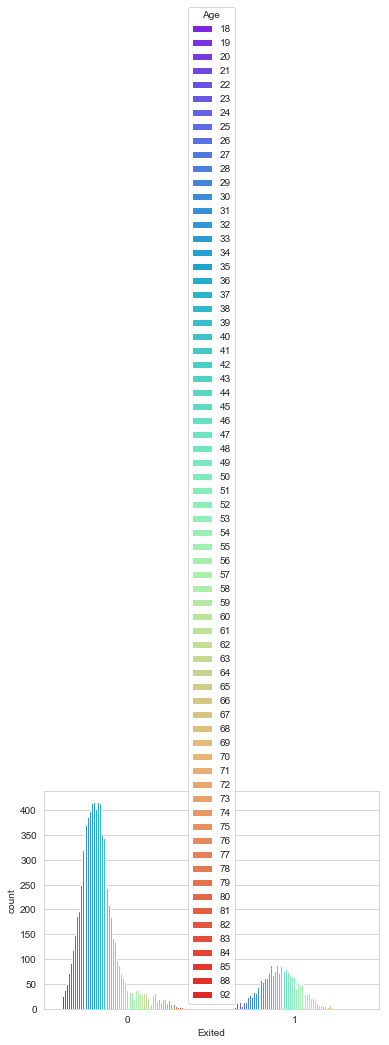

In [20]:
sns.set_style('whitegrid')
sns.countplot(x='Exited',hue='Age',data=df,palette='rainbow')

In [21]:
df1.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [22]:
df1.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [23]:
df2 = df1.drop('Surname',axis=1)
df2

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [24]:
df2.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le_gender = LabelEncoder()
le_geography = LabelEncoder()

In [34]:
df2['Gender_encoded']=le_gender.fit_transform(df2.Gender)
df2['Geography_encoded']=le_geography.fit_transform(df2.Geography)

In [38]:
data = df2.drop(['Geography','Gender'],axis=1)
data.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_encoded,Geography_encoded
0,619,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,2
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,2


In [40]:
feature_cols = data.drop(['Exited'],axis=1)
feature_cols.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_encoded,Geography_encoded
0,619,42,2,0.00,1,1,1,101348.88,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,2


In [41]:
X = feature_cols
y=data['Exited']

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((6700, 10), (6700,), (3300, 10), (3300,))

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
lr = LogisticRegression()

In [72]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [73]:
predictions=lr.predict(X_test)

In [74]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print('Classification Report: ',classification_report(y_test,predictions))
print('Confusion Matrix: ',confusion_matrix(y_test,predictions))


Classification Report:               precision    recall  f1-score   support

          0       0.79      1.00      0.88      2616
          1       0.36      0.01      0.01       684

avg / total       0.70      0.79      0.70      3300

Confusion Matrix:  [[2609    7]
 [ 680    4]]


In [75]:
print('Accuracy Score: ',accuracy_score(y_test,predictions))

Accuracy Score:  0.7918181818181819


In [76]:
left = pd.Series(predictions)
data['Prediction'] = left
data.to_csv('data1.csv')

In [77]:
df3  = pd.read_csv('data1.csv')
df3.head(10)

,Unnamed: 0,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_encoded,Geography_encoded,Prediction
0,0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0.0
1,1,608,41,1,83807.86,1,0,1,112542.58,0,0,2,0.0
2,2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0.0
3,3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0.0
4,4,850,43,2,125510.82,1,1,1,79084.10,0,0,2,0.0
5,5,645,44,8,113755.78,2,1,0,149756.71,1,1,2,0.0
6,6,822,50,7,0.00,2,1,1,10062.80,0,1,0,0.0
7,7,376,29,4,115046.74,4,1,0,119346.88,1,0,1,0.0
8,8,501,44,4,142051.07,2,0,1,74940.50,0,1,0,0.0
9,9,684,27,2,134603.88,1,1,1,71725.73,0,1,0,0.0


In [78]:
d4=pd.concat([df,df3],axis=1)
d4.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_encoded,Geography_encoded,Prediction
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,...,2,0.00,1,1,1,101348.88,1,0,0,0.0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,...,1,83807.86,1,0,1,112542.58,0,0,2,0.0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,...,8,159660.80,3,1,0,113931.57,1,0,0,0.0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,...,1,0.00,2,0,0,93826.63,0,0,0,0.0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,...,2,125510.82,1,1,1,79084.10,0,0,2,0.0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,...,8,113755.78,2,1,0,149756.71,1,1,2,0.0
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,...,7,0.00,2,1,1,10062.80,0,1,0,0.0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,...,4,115046.74,4,1,0,119346.88,1,0,1,0.0
8,9,15792365,He,501,France,Male,44,4,142051.07,2,...,4,142051.07,2,0,1,74940.50,0,1,0,0.0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,...,2,134603.88,1,1,1,71725.73,0,1,0,0.0
